<a href="https://colab.research.google.com/github/irene880104/datasharing/blob/master/SC_Projects_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation

In [ ]:
df = pd.read_excel("D:\OneDrive - Emory University\Desktop\yogt_trans.xlsx")

In [ ]:
df= df.drop('Unnamed: 0',axis=1)

In [ ]:
df

,STORE_ID,TXN_ID,TXN_DTE,PROMO_WEEK_ID,UPC_ID,UPC_DSC,PROMO_IND,ITEM_QTY
0,1463,9942146307826,2013-02-08,201306,2113007742,LUC YGRT PEACH,0,1
1,1463,9942146307826,2013-02-08,201306,2113007742,LUC YGRT PEACH,0,1
2,1463,9763146307827,2012-08-13,201232,89470001013,CHOBANI YOGURT GREEK NON-FAT PLAIN,1,0
3,1463,9763146307827,2012-08-13,201232,89470001013,CHOBANI YOGURT GREEK NON-FAT PLAIN,0,1
4,1463,9790146308203,2012-09-09,201236,3663203243,ACTIVIA HARVEST PEACH,0,1
...,...,...,...,...,...,...,...,...
458939,2713,9916271306964,2013-02-03,201305,89470001017,CHOBANI YOGURT APPLE CINNAMON,0,2
458940,2713,9916271306964,2013-02-03,201305,89470001017,CHOBANI YOGURT APPLE CINNAMON,0,2
458941,2713,9920271306480,2013-02-07,201306,5215959116,STONYFIELD YOGURT YOBABY VANILLA,0,1
458942,2713,9844271302013,2012-11-24,201247,3663202754,DANNON OIKOS VANILLA GREEK 0% FAT,0,1


In [ ]:
df['STORE_ID'].value_counts()

STORE_ID
1463    434620
2713     24324
Name: count, dtype: int64

In [ ]:
df.dtypes

STORE_ID                  int64
TXN_ID                    int64
TXN_DTE          datetime64[ns]
PROMO_WEEK_ID             int64
UPC_ID                    int64
UPC_DSC                  object
PROMO_IND                 int64
ITEM_QTY                  int64
dtype: object

In [ ]:
df = df[df['STORE_ID'] == 1463]

In [ ]:
df

,STORE_ID,TXN_ID,TXN_DTE,PROMO_WEEK_ID,UPC_ID,UPC_DSC,PROMO_IND,ITEM_QTY
0,1463,9942146307826,2013-02-08,201306,2113007742,LUC YGRT PEACH,0,1
1,1463,9942146307826,2013-02-08,201306,2113007742,LUC YGRT PEACH,0,1
2,1463,9763146307827,2012-08-13,201232,89470001013,CHOBANI YOGURT GREEK NON-FAT PLAIN,1,0
3,1463,9763146307827,2012-08-13,201232,89470001013,CHOBANI YOGURT GREEK NON-FAT PLAIN,0,1
4,1463,9790146308203,2012-09-09,201236,3663203243,ACTIVIA HARVEST PEACH,0,1
...,...,...,...,...,...,...,...,...
434615,1463,9608146309027,2012-03-11,201210,89470001009,CHOBANI YOGURT GREEK LEMON NON FAT,0,2
434616,1463,9608146309027,2012-03-11,201210,3663202180,DANNON YOGURT LIGHT & FIT CHERRY,0,1
434617,1463,9608146309027,2012-03-11,201210,3663202180,DANNON YOGURT LIGHT & FIT CHERRY,0,1
434618,1463,9791146310798,2012-09-10,201236,7527000161,MOUNTAIN HIGH YOGURT VANILLA,0,1


In [ ]:
df['Year'] = df['TXN_DTE'].dt.year
df['Month'] = df['TXN_DTE'].dt.month
df['Day'] = df['TXN_DTE'].dt.day

C:\Users\Welcome\AppData\Local\Temp\ipykernel_4268\2251862019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['TXN_DTE'].dt.year
C:\Users\Welcome\AppData\Local\Temp\ipykernel_4268\2251862019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['TXN_DTE'].dt.month
C:\Users\Welcome\AppData\Local\Temp\ipykernel_4268\2251862019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
df = df.sort_values('TXN_DTE',ascending=True)

In [ ]:
df

,STORE_ID,TXN_ID,TXN_DTE,PROMO_WEEK_ID,UPC_ID,UPC_DSC,PROMO_IND,ITEM_QTY,Year,Month,Day
103900,1463,9580146308894,2012-02-12,201206,7047000112,YOPLAIT CUSTARD YGRT VANILLA,0,2,2012,2,12
248012,1463,9580146306644,2012-02-12,201206,2113007926,LUC YGRT GREEK LT STRAWBERRY,0,1,2012,2,12
248011,1463,9580146306644,2012-02-12,201206,2113007931,LUC YGRT GREEK LT PEACH,0,1,2012,2,12
248010,1463,9580146306644,2012-02-12,201206,2113007934,LUC YGRT GREEK LT CHERRY,0,1,2012,2,12
433210,1463,9580146307116,2012-02-12,201206,7047000661,YOPLAIT YGRT BOSTON CRM PIE LT,0,1,2012,2,12
...,...,...,...,...,...,...,...,...,...,...,...
295039,1463,9943146310624,2013-02-09,201306,7047000651,YOPLAIT YGRT RASPBERRY LT,1,0,2013,2,9
220828,1463,9943146310899,2013-02-09,201306,85746800300,NaN,0,1,2013,2,9
388517,1463,9943146310881,2013-02-09,201306,3663203256,DANNON LIGHT & FIT GREEK CHERRY,1,0,2013,2,9
350399,1463,9943146306560,2013-02-09,201306,68954408023,FAGE YGRT GRK STRAINED CHRY PMGRNTE TOTA,0,1,2013,2,9


In [ ]:
df['BRAND_NAME'] = df['UPC_DSC'].str.split().str[0]

In [ ]:
df

,STORE_ID,TXN_ID,TXN_DTE,PROMO_WEEK_ID,UPC_ID,UPC_DSC,PROMO_IND,ITEM_QTY,Year,Month,Day,BRAND_NAME
103900,1463,9580146308894,2012-02-12,201206,7047000112,YOPLAIT CUSTARD YGRT VANILLA,0,2,2012,2,12,YOPLAIT
248012,1463,9580146306644,2012-02-12,201206,2113007926,LUC YGRT GREEK LT STRAWBERRY,0,1,2012,2,12,LUC
248011,1463,9580146306644,2012-02-12,201206,2113007931,LUC YGRT GREEK LT PEACH,0,1,2012,2,12,LUC
248010,1463,9580146306644,2012-02-12,201206,2113007934,LUC YGRT GREEK LT CHERRY,0,1,2012,2,12,LUC
433210,1463,9580146307116,2012-02-12,201206,7047000661,YOPLAIT YGRT BOSTON CRM PIE LT,0,1,2012,2,12,YOPLAIT
...,...,...,...,...,...,...,...,...,...,...,...,...
295039,1463,9943146310624,2013-02-09,201306,7047000651,YOPLAIT YGRT RASPBERRY LT,1,0,2013,2,9,YOPLAIT
220828,1463,9943146310899,2013-02-09,201306,85746800300,NaN,0,1,2013,2,9,NaN
388517,1463,9943146310881,2013-02-09,201306,3663203256,DANNON LIGHT & FIT GREEK CHERRY,1,0,2013,2,9,DANNON
350399,1463,9943146306560,2013-02-09,201306,68954408023,FAGE YGRT GRK STRAINED CHRY PMGRNTE TOTA,0,1,2013,2,9,FAGE


In [ ]:
# pick top three products from different brands based on sales
agg = df.groupby(pd.Grouper(key='UPC_DSC')).agg({'ITEM_QTY': 'sum'})
agg.sort_values('ITEM_QTY',ascending=False).head(20)

,ITEM_QTY
UPC_DSC,
CHOBANI GREEK YOGURT STAWBERRY NON-FAT,8014
CHOBANI GREEK YOGURT BLUEBERRY NON-FAT,7662
CHOBANI YOGURT MANGO GREEK LOWFAT,7644
CHOBANI GREEK YOGURT PEACH NON-FAT,6863
CHOBANI GREEK YOGURT VANILLA NON-FAT,6810
CHOBANI YOGURT GREEK BLK CHERRY NON FAT,6618
CHOBANI GREEK YOGURT RASPBERRY NON-FAT,6061
CHOBANI YOGURT GREEK LEMON NON FAT,6010
FAGE YGRT TOTAL NO FAT BLUBRY ACAI GRK S,5454


In [ ]:
'''
1. CHOBANI GREEK YOGURT STAWBERRY NON-FAT	8014
2. FAGE YGRT TOTAL NO FAT BLUBRY ACAI GRK S	5454
3. YOPLAIT YGRT MIXED BERRY	5090
'''

'\n1. CHOBANI GREEK YOGURT STAWBERRY NON-FAT\t8014\n2. FAGE YGRT TOTAL NO FAT BLUBRY ACAI GRK S\t5454\n3. YOPLAIT YGRT MIXED BERRY\t5090\n'

# YOPLAIT

In [ ]:
df_YOPLAIT = df[df['UPC_DSC'] == 'YOPLAIT YGRT MIXED BERRY']
df_YOPLAIT

,STORE_ID,TXN_ID,TXN_DTE,PROMO_WEEK_ID,UPC_ID,UPC_DSC,PROMO_IND,ITEM_QTY,Year,Month,Day,BRAND_NAME
316927,1463,9580146308958,2012-02-12,201206,7047000310,YOPLAIT YGRT MIXED BERRY,1,0,2012,2,12,YOPLAIT
316928,1463,9580146308958,2012-02-12,201206,7047000310,YOPLAIT YGRT MIXED BERRY,1,0,2012,2,12,YOPLAIT
296245,1463,9580146304209,2012-02-12,201206,7047000310,YOPLAIT YGRT MIXED BERRY,0,1,2012,2,12,YOPLAIT
296244,1463,9580146304209,2012-02-12,201206,7047000310,YOPLAIT YGRT MIXED BERRY,0,1,2012,2,12,YOPLAIT
296252,1463,9580146304209,2012-02-12,201206,7047000310,YOPLAIT YGRT MIXED BERRY,1,0,2012,2,12,YOPLAIT
...,...,...,...,...,...,...,...,...,...,...,...,...
317865,1463,9943146302531,2013-02-09,201306,7047000310,YOPLAIT YGRT MIXED BERRY,0,2,2013,2,9,YOPLAIT
71053,1463,9943146304875,2013-02-09,201306,7047000310,YOPLAIT YGRT MIXED BERRY,0,2,2013,2,9,YOPLAIT
71052,1463,9943146304875,2013-02-09,201306,7047000310,YOPLAIT YGRT MIXED BERRY,0,2,2013,2,9,YOPLAIT
71049,1463,9943146304875,2013-02-09,201306,7047000310,YOPLAIT YGRT MIXED BERRY,1,0,2013,2,9,YOPLAIT


In [ ]:
daily_df_YOPLAIT = df_YOPLAIT.groupby('TXN_DTE').agg({'ITEM_QTY': 'sum'})
daily_df_YOPLAIT = daily_df_YOPLAIT.reset_index()
daily_df_YOPLAIT

,TXN_DTE,ITEM_QTY
0,2012-02-12,18
1,2012-02-13,22
2,2012-02-14,16
3,2012-02-15,20
4,2012-02-16,10
...,...,...
351,2013-02-05,12
352,2013-02-06,2
353,2013-02-07,28
354,2013-02-08,10


In [ ]:
# daily_df_YOPLAIT = daily_df_YOPLAIT.drop('index',axis = 1)

In [ ]:
daily_df_YOPLAIT = daily_df_YOPLAIT[daily_df_YOPLAIT['TXN_DTE'] > '2012-02-18']
daily_df_YOPLAIT = daily_df_YOPLAIT.reset_index()

In [ ]:
daily_df_YOPLAIT

,index,TXN_DTE,ITEM_QTY
0,7,2012-02-19,10
1,8,2012-02-20,18
2,9,2012-02-21,12
3,10,2012-02-22,18
4,11,2012-02-23,14
...,...,...,...
344,351,2013-02-05,12
345,352,2013-02-06,2
346,353,2013-02-07,28
347,354,2013-02-08,10


In [ ]:
weekly_df_YOPLAIT = df_YOPLAIT.groupby(pd.Grouper(key='TXN_DTE', freq='1W')).agg({'ITEM_QTY': 'sum'})

In [ ]:
weekly_df_YOPLAIT = weekly_df_YOPLAIT.reset_index()

In [ ]:
weekly_df_YOPLAIT

,TXN_DTE,ITEM_QTY
0,2012-02-12,18
1,2012-02-19,104
2,2012-02-26,116
3,2012-03-04,116
4,2012-03-11,162
5,2012-03-18,116
6,2012-03-25,136
7,2012-04-01,162
8,2012-04-08,118
9,2012-04-15,98


In [ ]:
# first row doesn't have two weeks, we will ignore it
weekly_df_YOPLAIT = weekly_df_YOPLAIT.drop(weekly_df_YOPLAIT.index[0])
weekly_df_YOPLAIT

,TXN_DTE,ITEM_QTY
1,2012-02-19,104
2,2012-02-26,116
3,2012-03-04,116
4,2012-03-11,162
5,2012-03-18,116
6,2012-03-25,136
7,2012-04-01,162
8,2012-04-08,118
9,2012-04-15,98
10,2012-04-22,96


In [ ]:
# demand graph

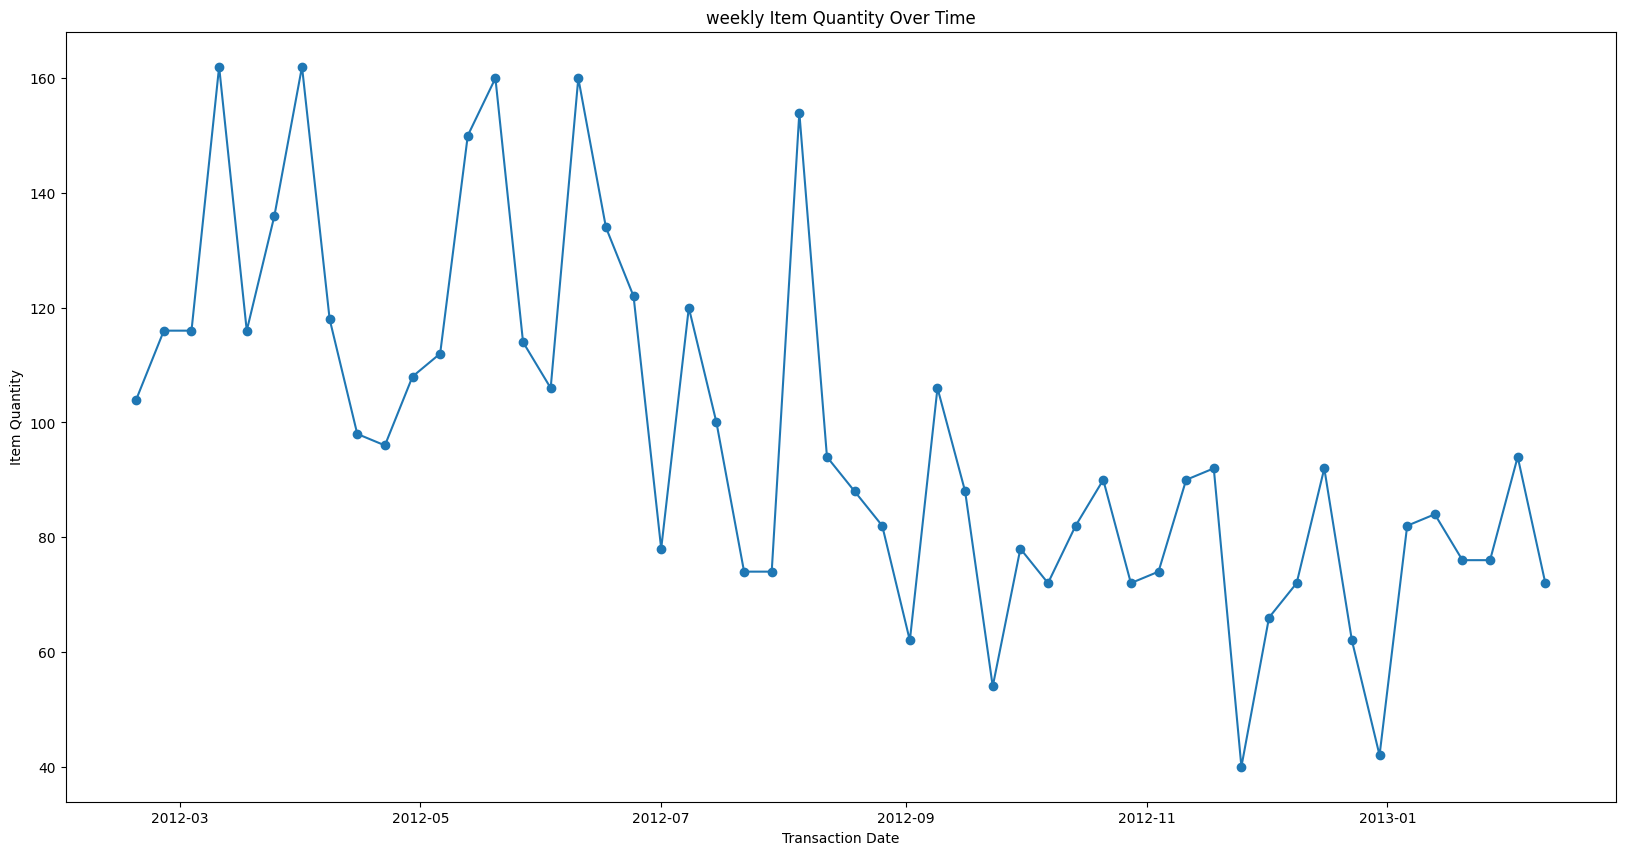

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(weekly_df_YOPLAIT['TXN_DTE'], weekly_df_YOPLAIT['ITEM_QTY'],marker='o')
plt.title('weekly Item Quantity Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Item Quantity')
plt.show()

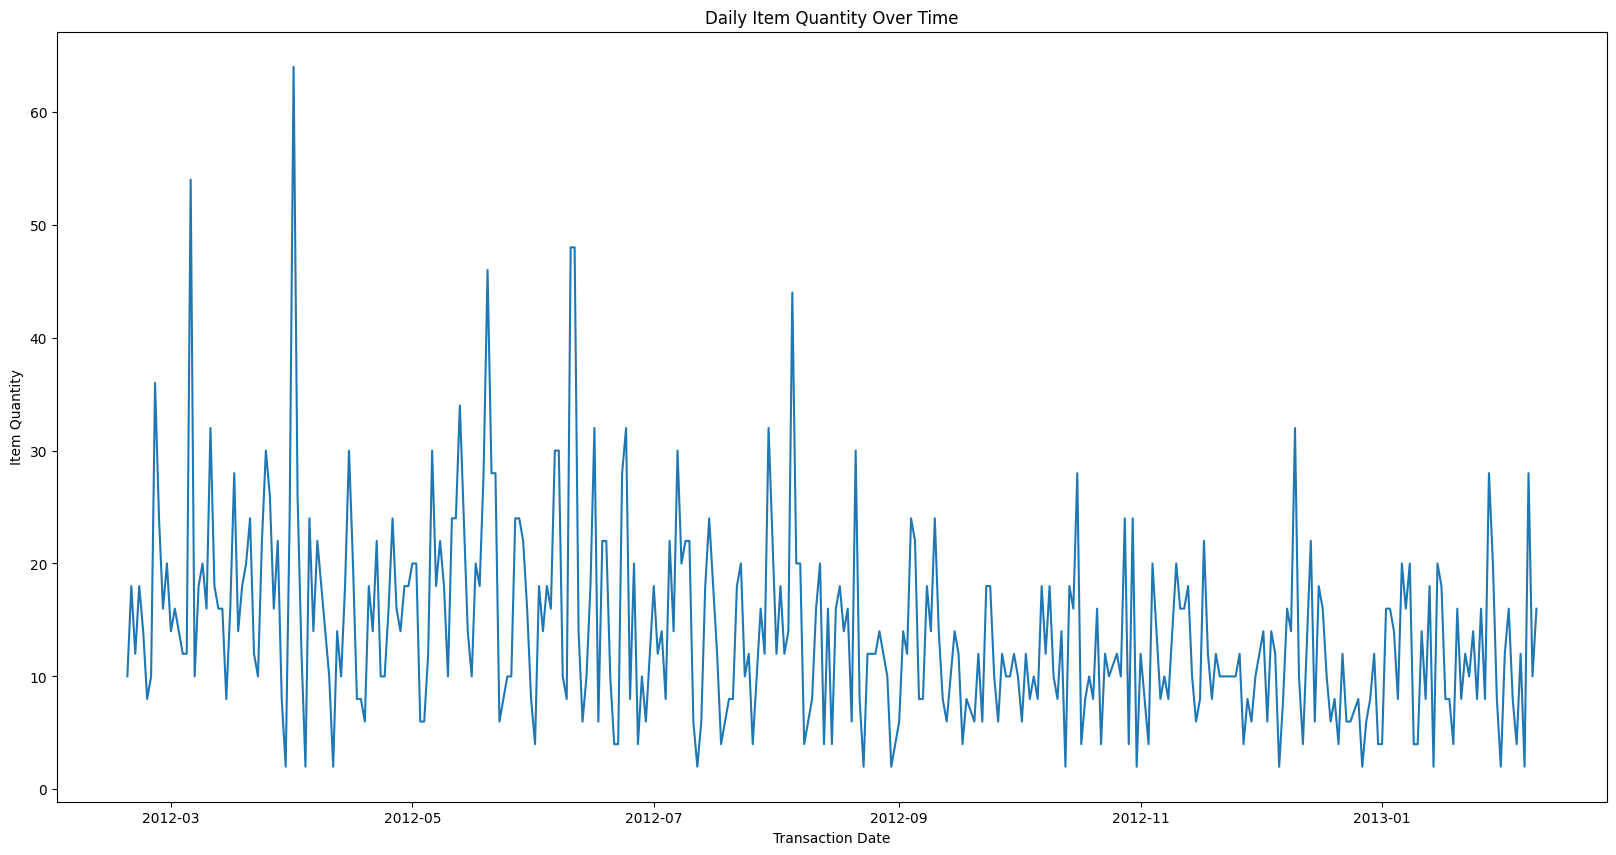

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(daily_df_YOPLAIT['TXN_DTE'], daily_df_YOPLAIT['ITEM_QTY'])
plt.title('Daily Item Quantity Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Item Quantity')
plt.show()

## Periodic Review

In [ ]:
'''
assumptions:
1. Lead Time = 1 week
2. Reorder Interval = 1 weeks

4. CSL = 0.9
5. holding cost = 0.05 dollars per unit per day
6. transportation cost = 0.03 dollars per unit
7. ordering cost = 30 dollars




'''

'\nassumptions:\n1. Lead Time = 1 week\n2. Reorder Interval = 1 weeks\n\n4. CSL = 0.9\n5. holding cost = 0.05 dollars per unit per day\n6. transportation cost = 0.03 dollars per unit \n7. ordering cost = 30 dollars\n\n\n\n\n'

In [ ]:
# assumptions/variables
L = 1
T = 1
CSL = 0.95
HC = 0.05 * 7
TC = 0.03
OC = 30

In [ ]:
Demand_YOPLAIT = np.mean(weekly_df_YOPLAIT['ITEM_QTY'])
Demand_YOPLAIT

97.53846153846153

In [ ]:
SD_YOPLAIT = np.std(weekly_df_YOPLAIT['ITEM_QTY'])
SD_YOPLAIT

30.14481811475395

In [ ]:
z = norm.ppf(CSL)

In [ ]:
SS_YOPLAIT = z * SD_YOPLAIT * np.sqrt(T + L)
SS_YOPLAIT = round(SS_YOPLAIT)
print(f'Safety stock for YOPLAIT is {SS_YOPLAIT:.0f} units')

Safety stock for YOPLAIT is 70 units


In [ ]:
OUL_YOPLAIT = Demand_YOPLAIT * (T+L) + SS_YOPLAIT
OUL_YOPLAIT = round(OUL_YOPLAIT)
print(f'OUL for YOPLAIT is {OUL_YOPLAIT:.0f} units')

OUL for YOPLAIT is 265 units


### Cost Calculation

In [ ]:
weekly_df_YOPLAIT.reset_index(drop=True, inplace=True)

In [ ]:
weekly_df_YOPLAIT_pr = weekly_df_YOPLAIT

In [ ]:
weekly_df_YOPLAIT_pr.head(3)

,TXN_DTE,ITEM_QTY
0,2012-02-19,104
1,2012-02-26,116
2,2012-03-04,116


In [ ]:
# Initialize DataFrame to calculate weekly inventory levels and costs
weekly_df_YOPLAIT_pr['Ending_Inventory'] = 0
weekly_df_YOPLAIT_pr['Order_Quantity'] = 0
weekly_df_YOPLAIT_pr['Weekly_Holding_Cost'] = 0
weekly_df_YOPLAIT_pr['Weekly_Transportation_Cost'] = 0

# Initial inventory set to 0 for the first week
inventory = 0

# Simulate weekly inventory and order calculations
for i in range(len(weekly_df_YOPLAIT_pr)):
    if i == 0:
        # No initial inventory, so order up to OUL
        order_quantity = OUL_YOPLAIT - inventory
    else:
        # Calculate needed order quantity to reach OUL
        order_quantity = max(0, OUL_YOPLAIT - inventory)

    # Update inventory after order is received
    inventory = inventory + order_quantity - weekly_df_YOPLAIT_pr.loc[i, 'ITEM_QTY']
    inventory = max(0, inventory)  # Inventory cannot be negative

    # Calculate costs
    weekly_holding_cost = inventory * HC
    weekly_transportation_order_cost = order_quantity * TC + OC

    # Record the calculations
    weekly_df_YOPLAIT_pr.loc[i, 'Ending_Inventory'] = inventory
    weekly_df_YOPLAIT_pr.loc[i, 'Order_Quantity'] = order_quantity
    weekly_df_YOPLAIT_pr.loc[i, 'Weekly_Holding_Cost'] = weekly_holding_cost
    weekly_df_YOPLAIT_pr.loc[i, 'weekly_transportation_order_cost'] = weekly_transportation_order_cost

# Sum up total costs for the year
total_holding_costs = weekly_df_YOPLAIT_pr['Weekly_Holding_Cost'].sum()
toal_transportation_order_cost = weekly_df_YOPLAIT_pr['weekly_transportation_order_cost'].sum()
total_cost = total_holding_costs + toal_transportation_order_cost
round(total_holding_costs), round(toal_transportation_order_cost), round(total_cost), weekly_df_YOPLAIT_pr

(3048,
 1718,
 4766,
       TXN_DTE  ITEM_QTY  Ending_Inventory  Order_Quantity  \
 0  2012-02-19       104               161             265   
 1  2012-02-26       116               149             104   
 2  2012-03-04       116               149             116   
 3  2012-03-11       162               103             116   
 4  2012-03-18       116               149             162   
 5  2012-03-25       136               129             116   
 6  2012-04-01       162               103             136   
 7  2012-04-08       118               147             162   
 8  2012-04-15        98               167             118   
 9  2012-04-22        96               169              98   
 10 2012-04-29       108               157              96   
 11 2012-05-06       112               153             108   
 12 2012-05-13       150               115             112   
 13 2012-05-20       160               105             150   
 14 2012-05-27       114               151       

## Continuous Review

In [ ]:
daily_df_YOPLAIT_cr = daily_df_YOPLAIT

In [ ]:
Demand_YOPLAIT = np.mean(daily_df_YOPLAIT_cr['ITEM_QTY'])
Demand_YOPLAIT
print(f'Daily demand for YOPLAIT is {Demand_YOPLAIT:.0f} units')

Daily demand for YOPLAIT is 14 units


In [ ]:
SD_YOPLAIT = np.std(daily_df_YOPLAIT_cr['ITEM_QTY'])
SD_YOPLAIT

8.701307060364407

In [ ]:
SS_YOPLAIT = z * SD_YOPLAIT * np.sqrt(T + L)
SS_YOPLAIT = round(SS_YOPLAIT)
print(f'Daily Safety stock for YOPLAIT is {SS_YOPLAIT:.0f} units')

Daily Safety stock for YOPLAIT is 20 units


In [ ]:
ROP_YOPLAIT = Demand_YOPLAIT * L * 7 + SS_YOPLAIT
ROP_YOPLAIT = round(ROP_YOPLAIT)
print(f'Reorder point for YOPLAIT is {ROP_YOPLAIT:.0f} units')

Reorder point for YOPLAIT is 120 units


In [ ]:
annual_demand_YOPLAIT = daily_df_YOPLAIT_cr['ITEM_QTY'].sum()
EOQ_YOPLAIT = np.sqrt((2 * annual_demand_YOPLAIT * OC)/ (HC/7*365))
EOQ_YOPLAIT = round(EOQ_YOPLAIT)
print(f'Reorder quantity for YOPLAIT is {EOQ_YOPLAIT:.0f} units')

Reorder quantity for YOPLAIT is 128 units


### cost

In [ ]:
# Initialize inventory simulation DataFrame
daily_df_YOPLAIT_cr['Ending_Inventory'] = 0
daily_df_YOPLAIT_cr['Order_Quantity'] = 0
daily_df_YOPLAIT_cr['Weekly_Holding_Cost'] = 0
daily_df_YOPLAIT_cr['weekly_transportation_order_cost'] = 0
daily_df_YOPLAIT_cr['Order_Placed'] = False

# Initial inventory set to reorder point for the start
inventory = ROP_YOPLAIT
total_ordering_costs = 0

# Simulate weekly inventory and order calculations
for i in range(len(daily_df_YOPLAIT_cr)):
    # Start the week by checking if an order is needed
    if inventory <= ROP_YOPLAIT:
        order_quantity = EOQ_YOPLAIT
        total_ordering_costs += OC
        inventory += order_quantity
        daily_df_YOPLAIT_cr.at[i, 'Order_Placed'] = True
        daily_df_YOPLAIT_cr.at[i, 'weekly_transportation_order_cost'] = order_quantity * TC + OC
    else:
        order_quantity = 0
        daily_df_YOPLAIT_cr.at[i, 'weekly_transportation_order_cost'] = 0

    # Reduce inventory by the week's demand and update DataFrame
    inventory -= daily_df_YOPLAIT_cr.loc[i, 'ITEM_QTY']
    inventory = max(0, inventory)  # Ensure inventory does not go negative
    weekly_holding_cost = inventory * (HC/7)  # Weekly holding cost

    # Record the calculations
    daily_df_YOPLAIT_cr.at[i, 'Ending_Inventory'] = inventory
    daily_df_YOPLAIT_cr.at[i, 'Order_Quantity'] = order_quantity
    daily_df_YOPLAIT_cr.at[i, 'Weekly_Holding_Cost'] = weekly_holding_cost

# Calculate total costs
total_holding_costs = daily_df_YOPLAIT_cr['Weekly_Holding_Cost'].sum()
total_transportation_order_cost = daily_df_YOPLAIT_cr['weekly_transportation_order_cost'].sum()
total_cost = total_holding_costs + total_transportation_order_cost
# Output results

total_cost = total_holding_costs + total_transportation_order_cost
round(total_holding_costs), round(total_transportation_order_cost), round(total_cost), daily_df_YOPLAIT_cr

(2966,
 1320,
 4286,
      index    TXN_DTE  ITEM_QTY  Ending_Inventory  Order_Quantity  \
 0        7 2012-02-19        10               238             128   
 1        8 2012-02-20        18               220               0   
 2        9 2012-02-21        12               208               0   
 3       10 2012-02-22        18               190               0   
 4       11 2012-02-23        14               176               0   
 ..     ...        ...       ...               ...             ...   
 344    351 2013-02-05        12               190               0   
 345    352 2013-02-06         2               188               0   
 346    353 2013-02-07        28               160               0   
 347    354 2013-02-08        10               150               0   
 348    355 2013-02-09        16               134               0   
 
      Weekly_Holding_Cost  weekly_transportation_order_cost  Order_Placed  
 0                   11.9                             33.84  

# CHOBANI

In [ ]:
df_CHOBANI = df[df['UPC_DSC'] == 'CHOBANI GREEK YOGURT STAWBERRY NON-FAT']
df_CHOBANI

,STORE_ID,TXN_ID,TXN_DTE,PROMO_WEEK_ID,UPC_ID,UPC_DSC,PROMO_IND,ITEM_QTY,Year,Month,Day,BRAND_NAME
117299,1463,9580146301447,2012-02-12,201206,89470001004,CHOBANI GREEK YOGURT STAWBERRY NON-FAT,0,5,2012,2,12,CHOBANI
117298,1463,9580146301447,2012-02-12,201206,89470001004,CHOBANI GREEK YOGURT STAWBERRY NON-FAT,1,0,2012,2,12,CHOBANI
405391,1463,9580146302614,2012-02-12,201206,89470001004,CHOBANI GREEK YOGURT STAWBERRY NON-FAT,1,0,2012,2,12,CHOBANI
363657,1463,9580146307448,2012-02-12,201206,89470001004,CHOBANI GREEK YOGURT STAWBERRY NON-FAT,1,0,2012,2,12,CHOBANI
18861,1463,9580146309011,2012-02-12,201206,89470001004,CHOBANI GREEK YOGURT STAWBERRY NON-FAT,1,0,2012,2,12,CHOBANI
...,...,...,...,...,...,...,...,...,...,...,...,...
336451,1463,9943146302312,2013-02-09,201306,89470001004,CHOBANI GREEK YOGURT STAWBERRY NON-FAT,0,1,2013,2,9,CHOBANI
72430,1463,9943146309634,2013-02-09,201306,89470001004,CHOBANI GREEK YOGURT STAWBERRY NON-FAT,0,5,2013,2,9,CHOBANI
72429,1463,9943146309634,2013-02-09,201306,89470001004,CHOBANI GREEK YOGURT STAWBERRY NON-FAT,1,0,2013,2,9,CHOBANI
254917,1463,9943146300939,2013-02-09,201306,89470001004,CHOBANI GREEK YOGURT STAWBERRY NON-FAT,0,4,2013,2,9,CHOBANI


In [ ]:
daily_df_CHOBANI = df_CHOBANI.groupby('TXN_DTE').agg({'ITEM_QTY': 'sum'})
daily_df_CHOBANI = daily_df_CHOBANI.reset_index()
daily_df_CHOBANI

,TXN_DTE,ITEM_QTY
0,2012-02-12,68
1,2012-02-13,33
2,2012-02-14,32
3,2012-02-15,4
4,2012-02-16,8
...,...,...
357,2013-02-05,5
358,2013-02-06,11
359,2013-02-07,6
360,2013-02-08,18


In [ ]:
# daily_df_CHOBANI = daily_df_CHOBANI.drop('index',axis = 1)

In [ ]:
daily_df_CHOBANI = daily_df_CHOBANI[daily_df_CHOBANI['TXN_DTE'] > '2012-02-18']
daily_df_CHOBANI = daily_df_CHOBANI.reset_index()

In [ ]:
daily_df_CHOBANI

,index,TXN_DTE,ITEM_QTY
0,7,2012-02-19,26
1,8,2012-02-20,27
2,9,2012-02-21,18
3,10,2012-02-22,30
4,11,2012-02-23,10
...,...,...,...
350,357,2013-02-05,5
351,358,2013-02-06,11
352,359,2013-02-07,6
353,360,2013-02-08,18


In [ ]:
weekly_df_CHOBANI = df_CHOBANI.groupby(pd.Grouper(key='TXN_DTE', freq='1W')).agg({'ITEM_QTY': 'sum'})

In [ ]:
weekly_df_CHOBANI = weekly_df_CHOBANI.reset_index()

In [ ]:
weekly_df_CHOBANI

,TXN_DTE,ITEM_QTY
0,2012-02-12,68
1,2012-02-19,142
2,2012-02-26,157
3,2012-03-04,171
4,2012-03-11,161
5,2012-03-18,154
6,2012-03-25,152
7,2012-04-01,140
8,2012-04-08,144
9,2012-04-15,165


In [ ]:
# demand graph

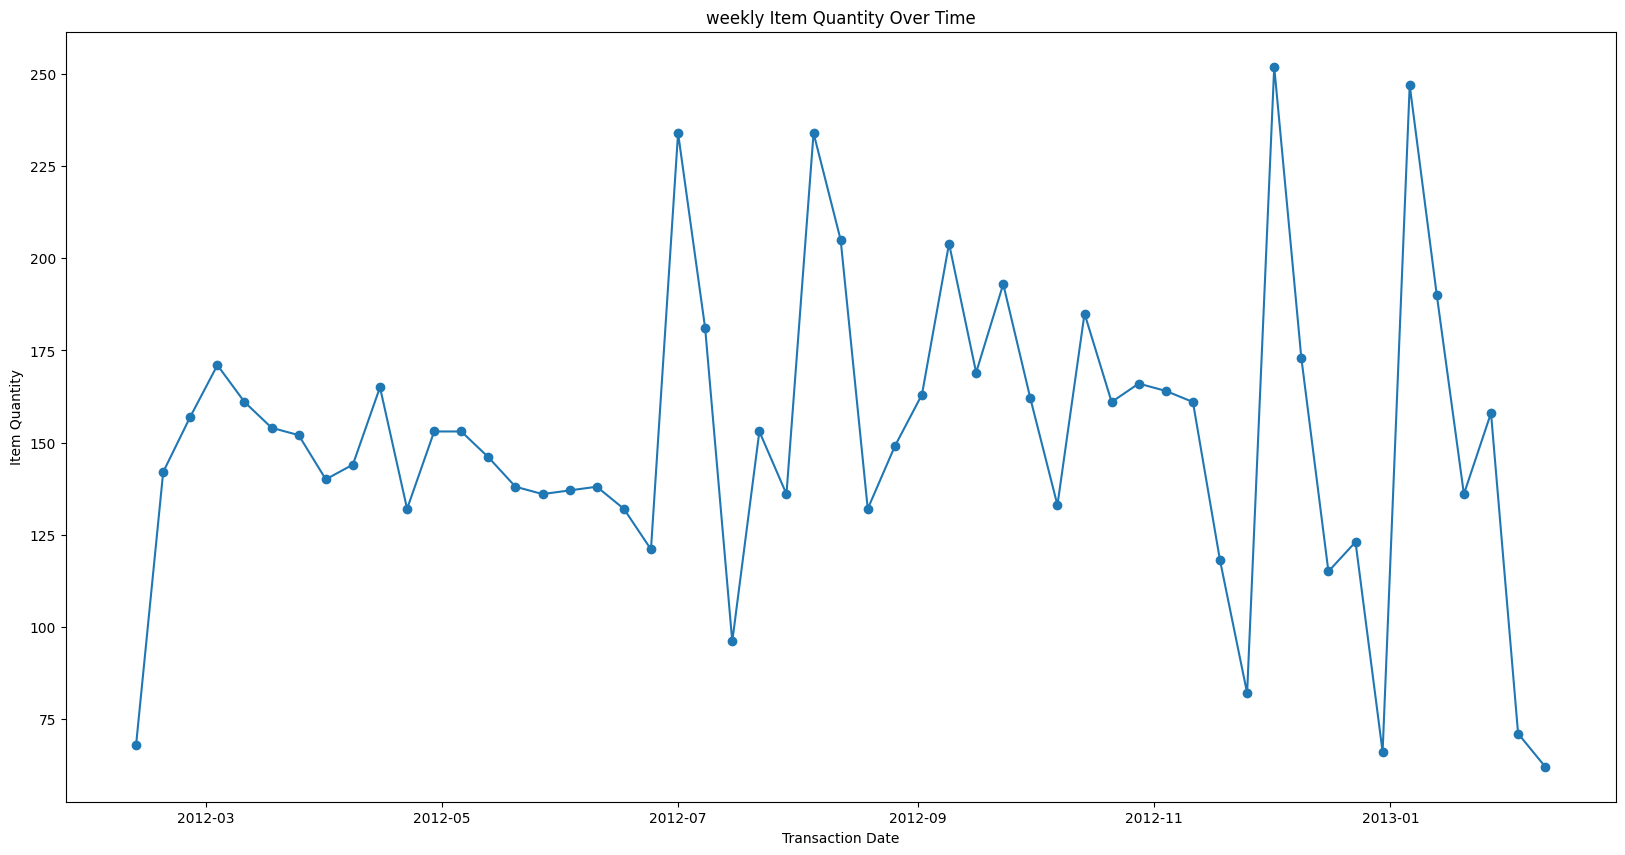

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(weekly_df_CHOBANI['TXN_DTE'], weekly_df_CHOBANI['ITEM_QTY'],marker='o')
plt.title('weekly Item Quantity Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Item Quantity')
plt.show()

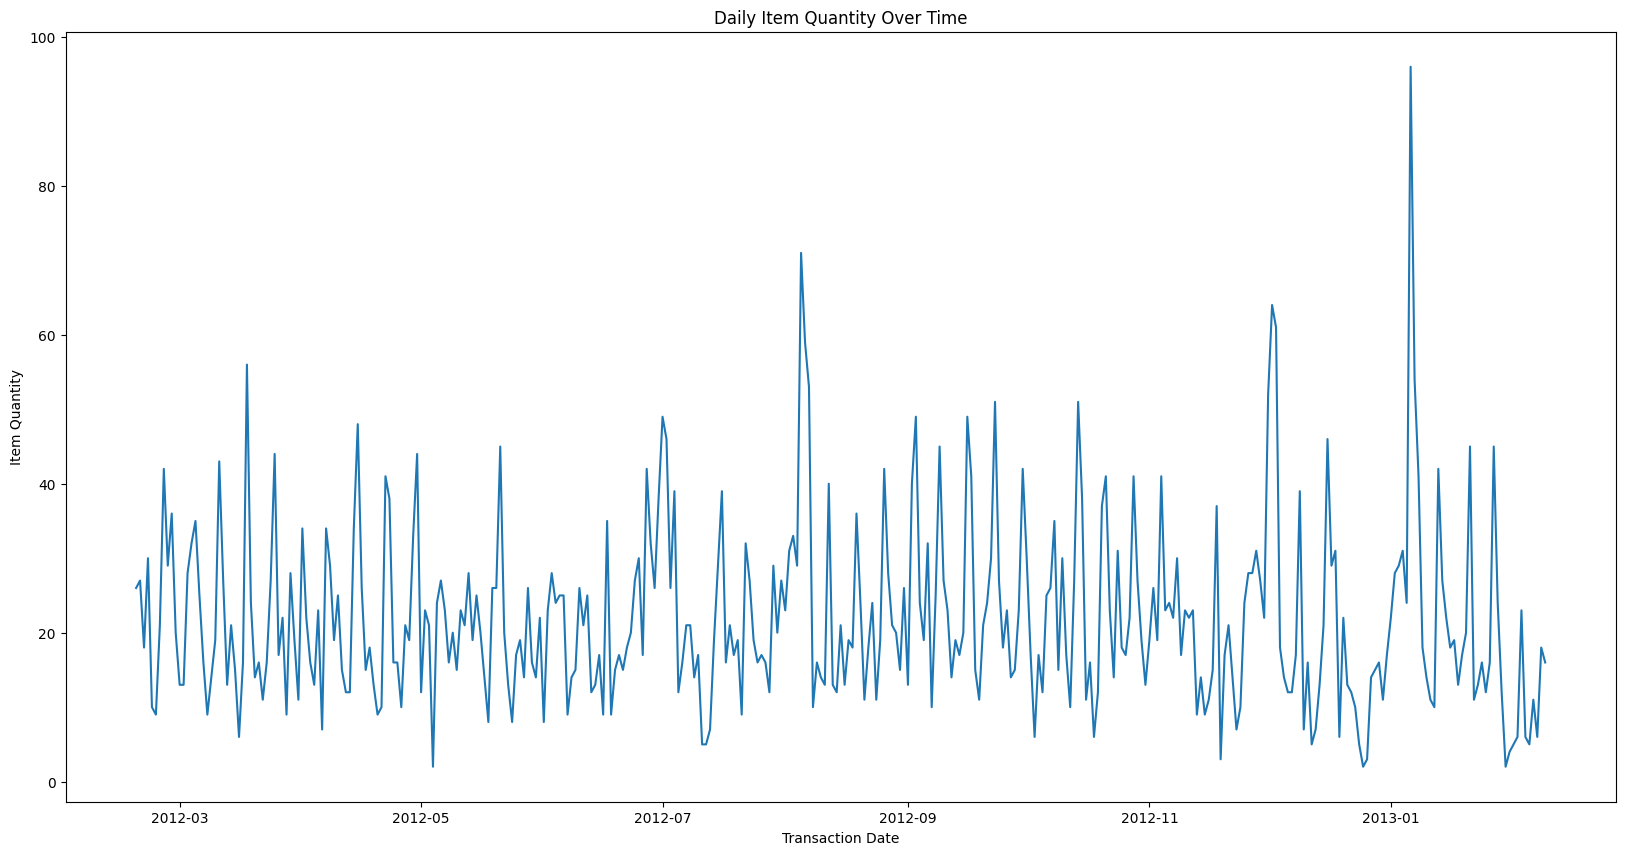

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(daily_df_CHOBANI['TXN_DTE'], daily_df_CHOBANI['ITEM_QTY'])
plt.title('Daily Item Quantity Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Item Quantity')
plt.show()

## Periodic Review

In [ ]:
'''
assumptions:
1. Lead Time = 1 week
2. Reorder Interval = 3 weeks

4. CSL = 0.95
5. holding cost = 0.05 dollars per unit per day
6. transportation cost = 0.05 dollars per unit
7. ordering cost = 50 dollars




'''

'\nassumptions:\n1. Lead Time = 1 week\n2. Reorder Interval = 1 weeks\n\n4. CSL = 0.95\n5. holding cost = 0.05 dollars per unit per day\n6. transportation cost = 0.05 dollars per unit \n7. ordering cost = 50 dollars\n\n\n\n\n'

In [ ]:
# assumptions/variables
L = 1
T = 3
CSL = 0.95
HC = 0.05 * 7
TC = 0.03
OC = 30

In [ ]:
Demand_CHOBANI = np.mean(weekly_df_CHOBANI['ITEM_QTY'])
Demand_CHOBANI

151.20754716981133

In [ ]:
SD_CHOBANI = np.std(weekly_df_CHOBANI['ITEM_QTY'])
SD_CHOBANI

41.18864035123791

In [ ]:
z = norm.ppf(CSL)

In [ ]:
SS_CHOBANI = z * SD_CHOBANI * np.sqrt(T + L)
SS_CHOBANI = round(SS_CHOBANI)
print(f'Safety stock for YOPLAIT is {SS_CHOBANI:.0f} units')

Safety stock for YOPLAIT is 135 units


In [ ]:
OUL_CHOBANI = Demand_CHOBANI * (T+L) + SS_CHOBANI
OUL_CHOBANI = round(OUL_CHOBANI)
print(f'OUL for YOPLAIT is {OUL_CHOBANI:.0f} units')

OUL for YOPLAIT is 740 units


### Cost Calculation

In [ ]:
weekly_df_CHOBANI.reset_index(drop=True, inplace=True)

In [ ]:
weekly_df_CHOBANI_pr = weekly_df_CHOBANI

In [ ]:
weekly_df_CHOBANI_pr.head(3)

,TXN_DTE,ITEM_QTY
0,2012-02-12,68
1,2012-02-19,142
2,2012-02-26,157


In [ ]:
# Initialize DataFrame to calculate weekly inventory levels and costs
weekly_df_CHOBANI_pr['Ending_Inventory'] = 0
weekly_df_CHOBANI_pr['Order_Quantity'] = 0
weekly_df_CHOBANI_pr['Weekly_Holding_Cost'] = 0
weekly_df_CHOBANI_pr['Weekly_Transportation_Cost'] = 0

# Initial inventory set to 0 for the first week
inventory = 0

# Simulate weekly inventory and order calculations
for i in range(len(weekly_df_CHOBANI_pr)):
    if i == 0:
        # No initial inventory, so order up to OUL
        order_quantity = OUL_CHOBANI - inventory
    else:
        # Calculate needed order quantity to reach OUL
        order_quantity = max(0, OUL_CHOBANI - inventory)

    # Update inventory after order is received
    inventory = inventory + order_quantity - weekly_df_CHOBANI_pr.loc[i, 'ITEM_QTY']
    inventory = max(0, inventory)  # Inventory cannot be negative

    # Calculate costs
    weekly_holding_cost = inventory * HC
    weekly_transportation_order_cost = order_quantity * TC + OC

    # Record the calculations
    weekly_df_CHOBANI_pr.loc[i, 'Ending_Inventory'] = inventory
    weekly_df_CHOBANI_pr.loc[i, 'Order_Quantity'] = order_quantity
    weekly_df_CHOBANI_pr.loc[i, 'Weekly_Holding_Cost'] = weekly_holding_cost
    weekly_df_CHOBANI_pr.loc[i, 'weekly_transportation_order_cost'] = weekly_transportation_order_cost

# Sum up total costs for the year
total_holding_costs = weekly_df_CHOBANI_pr['Weekly_Holding_Cost'].sum()
toal_transportation_order_cost = weekly_df_CHOBANI_pr['weekly_transportation_order_cost'].sum()
total_cost = total_holding_costs + toal_transportation_order_cost
round(total_holding_costs), round(toal_transportation_order_cost), round(total_cost), weekly_df_CHOBANI_pr

(10922,
 1851,
 12773,
       TXN_DTE  ITEM_QTY  Ending_Inventory  Order_Quantity  \
 0  2012-02-12        68               672             740   
 1  2012-02-19       142               598              68   
 2  2012-02-26       157               583             142   
 3  2012-03-04       171               569             157   
 4  2012-03-11       161               579             171   
 5  2012-03-18       154               586             161   
 6  2012-03-25       152               588             154   
 7  2012-04-01       140               600             152   
 8  2012-04-08       144               596             140   
 9  2012-04-15       165               575             144   
 10 2012-04-22       132               608             165   
 11 2012-04-29       153               587             132   
 12 2012-05-06       153               587             153   
 13 2012-05-13       146               594             153   
 14 2012-05-20       138               602     

## Continuous Review

In [ ]:
daily_df_CHOBANI_cr = daily_df_CHOBANI

In [ ]:
Demand_CHOBANI = np.mean(daily_df_CHOBANI['ITEM_QTY'])
Demand_CHOBANI
print(f'Daily demand for YOPLAIT is {Demand_CHOBANI:.0f} units')

Daily demand for YOPLAIT is 22 units


In [ ]:
SD_CHOBANI = np.std(daily_df_CHOBANI['ITEM_QTY'])
SD_CHOBANI

12.341487713575235

In [ ]:
SS_CHOBANI = z * SD_CHOBANI * np.sqrt(T + L)
SS_CHOBANI = round(SS_CHOBANI)
print(f'Daily Safety stock for YOPLAIT is {SS_CHOBANI:.0f} units')

Daily Safety stock for YOPLAIT is 41 units


In [ ]:
ROP_CHOBANI = Demand_CHOBANI * L * 7 + SS_CHOBANI
ROP_CHOBANI = round(ROP_CHOBANI)
print(f'Reorder point for YOPLAIT is {ROP_CHOBANI:.0f} units')

Reorder point for YOPLAIT is 195 units


In [ ]:
annual_demand_CHOBANI = daily_df_CHOBANI_cr['ITEM_QTY'].sum()
EOQ_CHOBANI = np.sqrt((2 * annual_demand_CHOBANI * OC)/ (HC/7*365))
EOQ_CHOBANI = round(EOQ_CHOBANI)
print(f'Reorder quantity for YOPLAIT is {EOQ_CHOBANI:.0f} units')

Reorder quantity for YOPLAIT is 160 units


### cost

In [ ]:
# Initialize inventory simulation DataFrame
daily_df_CHOBANI_cr['Ending_Inventory'] = 0
daily_df_CHOBANI_cr['Order_Quantity'] = 0
daily_df_CHOBANI_cr['daily_Holding_Cost'] = 0
daily_df_CHOBANI_cr['daily_transportation_order_cost'] = 0
daily_df_CHOBANI_cr['Order_Placed'] = False

# Initial inventory set to reorder point for the start
inventory = ROP_CHOBANI
total_ordering_costs = 0

# Simulate weekly inventory and order calculations
for i in range(len(daily_df_CHOBANI_cr)):
    # Start the week by checking if an order is needed
    if inventory <= ROP_CHOBANI:
        order_quantity = EOQ_CHOBANI
        total_ordering_costs += OC
        inventory += order_quantity
        daily_df_CHOBANI_cr.at[i, 'Order_Placed'] = True
        daily_df_CHOBANI_cr.at[i, 'daily_transportation_order_cost'] = order_quantity * TC + OC
    else:
        order_quantity = 0
        daily_df_CHOBANI_cr.at[i, 'daily_transportation_order_cost'] = 0

    # Reduce inventory by the week's demand and update DataFrame
    inventory -= daily_df_CHOBANI_cr.loc[i, 'ITEM_QTY']
    inventory = max(0, inventory)  # Ensure inventory does not go negative
    weekly_holding_cost = inventory * (HC/7)  # Weekly holding cost

    # Record the calculations
    daily_df_CHOBANI_cr.at[i, 'Ending_Inventory'] = inventory
    daily_df_CHOBANI_cr.at[i, 'Order_Quantity'] = order_quantity
    daily_df_CHOBANI_cr.at[i, 'daily_Holding_Cost'] = weekly_holding_cost

# Calculate total costs
total_holding_costs = daily_df_CHOBANI_cr['daily_Holding_Cost'].sum()
total_transportation_order_cost = daily_df_CHOBANI_cr['daily_transportation_order_cost'].sum()
total_cost = total_holding_costs + total_transportation_order_cost
# Output results
round(total_holding_costs), round(total_transportation_order_cost), round(total_cost), daily_df_CHOBANI_cr

(4509,
 1705,
 6215,
      index    TXN_DTE  ITEM_QTY  Ending_Inventory  Order_Quantity  \
 0        7 2012-02-19        26               329             160   
 1        8 2012-02-20        27               302               0   
 2        9 2012-02-21        18               284               0   
 3       10 2012-02-22        30               254               0   
 4       11 2012-02-23        10               244               0   
 ..     ...        ...       ...               ...             ...   
 350    357 2013-02-05         5               256               0   
 351    358 2013-02-06        11               245               0   
 352    359 2013-02-07         6               239               0   
 353    360 2013-02-08        18               221               0   
 354    361 2013-02-09        16               205               0   
 
      daily_Holding_Cost  daily_transportation_order_cost  Order_Placed  
 0                 16.45                             34.8      

# FAGE

In [ ]:
df_FAGE = df[df['UPC_DSC'] == 'FAGE YGRT TOTAL NO FAT BLUBRY ACAI GRK S']
df_FAGE

,STORE_ID,TXN_ID,TXN_DTE,PROMO_WEEK_ID,UPC_ID,UPC_DSC,PROMO_IND,ITEM_QTY,Year,Month,Day,BRAND_NAME
230342,1463,9580146310853,2012-02-12,201206,68954408013,FAGE YGRT TOTAL NO FAT BLUBRY ACAI GRK S,0,1,2012,2,12,FAGE
230341,1463,9580146310853,2012-02-12,201206,68954408013,FAGE YGRT TOTAL NO FAT BLUBRY ACAI GRK S,0,1,2012,2,12,FAGE
183743,1463,9580146306794,2012-02-12,201206,68954408013,FAGE YGRT TOTAL NO FAT BLUBRY ACAI GRK S,0,1,2012,2,12,FAGE
183742,1463,9580146306794,2012-02-12,201206,68954408013,FAGE YGRT TOTAL NO FAT BLUBRY ACAI GRK S,0,1,2012,2,12,FAGE
371602,1463,9580146303202,2012-02-12,201206,68954408013,FAGE YGRT TOTAL NO FAT BLUBRY ACAI GRK S,0,5,2012,2,12,FAGE
...,...,...,...,...,...,...,...,...,...,...,...,...
200019,1463,9943146309267,2013-02-09,201306,68954408013,FAGE YGRT TOTAL NO FAT BLUBRY ACAI GRK S,0,1,2013,2,9,FAGE
52331,1463,9943146304707,2013-02-09,201306,68954408013,FAGE YGRT TOTAL NO FAT BLUBRY ACAI GRK S,0,2,2013,2,9,FAGE
52330,1463,9943146304707,2013-02-09,201306,68954408013,FAGE YGRT TOTAL NO FAT BLUBRY ACAI GRK S,0,2,2013,2,9,FAGE
350396,1463,9943146306560,2013-02-09,201306,68954408013,FAGE YGRT TOTAL NO FAT BLUBRY ACAI GRK S,0,2,2013,2,9,FAGE


In [ ]:
daily_df_FAGE = df_FAGE.groupby('TXN_DTE').agg({'ITEM_QTY': 'sum'})
daily_df_FAGE = daily_df_FAGE.reset_index()
daily_df_FAGE

,TXN_DTE,ITEM_QTY
0,2012-02-12,14
1,2012-02-13,10
2,2012-02-14,14
3,2012-02-15,2
4,2012-02-18,14
...,...,...
324,2013-02-05,14
325,2013-02-06,12
326,2013-02-07,8
327,2013-02-08,6


In [ ]:
# daily_df_FAGE = daily_df_FAGE.drop('index',axis = 1)

In [ ]:
daily_df_FAGE = daily_df_FAGE[daily_df_FAGE['TXN_DTE'] > '2012-02-18']
daily_df_FAGE = daily_df_FAGE.reset_index()

In [ ]:
daily_df_FAGE

,index,TXN_DTE,ITEM_QTY
0,5,2012-02-19,22
1,6,2012-02-20,18
2,7,2012-02-21,4
3,8,2012-02-22,6
4,9,2012-02-23,8
...,...,...,...
319,324,2013-02-05,14
320,325,2013-02-06,12
321,326,2013-02-07,8
322,327,2013-02-08,6


In [ ]:
weekly_df_FAGE = df_FAGE.groupby(pd.Grouper(key='TXN_DTE', freq='1W')).agg({'ITEM_QTY': 'sum'})

In [ ]:
weekly_df_FAGE = weekly_df_FAGE.reset_index()

In [ ]:
weekly_df_FAGE

,TXN_DTE,ITEM_QTY
0,2012-02-12,14
1,2012-02-19,62
2,2012-02-26,80
3,2012-03-04,92
4,2012-03-11,100
5,2012-03-18,126
6,2012-03-25,66
7,2012-04-01,80
8,2012-04-08,48
9,2012-04-15,42


In [ ]:
# first row doesn't have two weeks, we will ignore it
weekly_df_FAGE = weekly_df_FAGE.drop(weekly_df_FAGE.index[0])
weekly_df_FAGE

,TXN_DTE,ITEM_QTY
1,2012-02-19,62
2,2012-02-26,80
3,2012-03-04,92
4,2012-03-11,100
5,2012-03-18,126
6,2012-03-25,66
7,2012-04-01,80
8,2012-04-08,48
9,2012-04-15,42
10,2012-04-22,122


In [ ]:
# demand graph

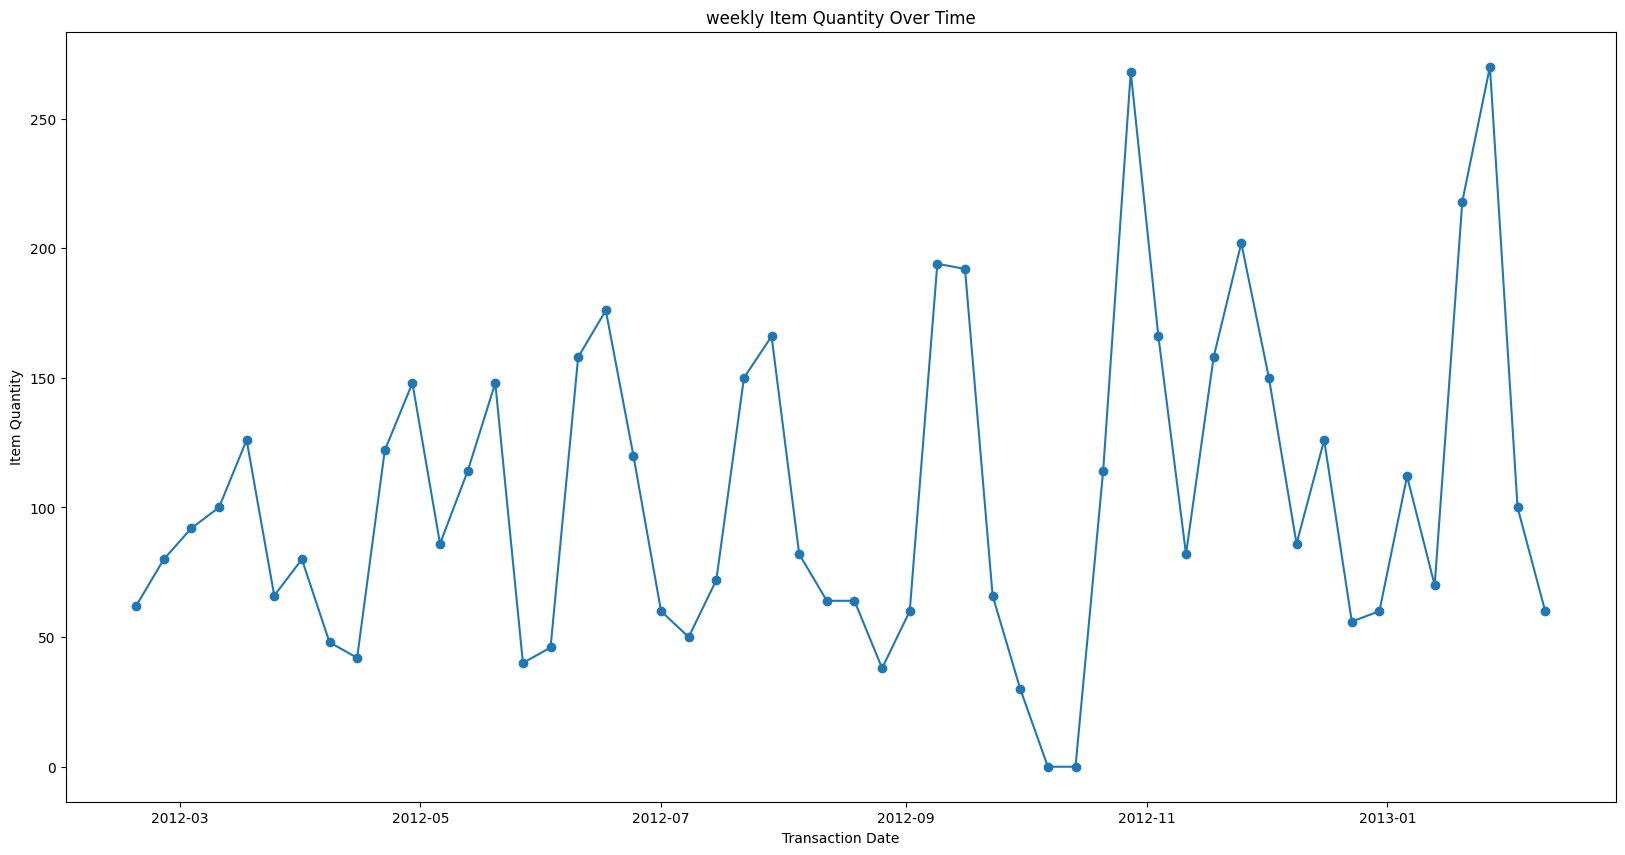

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(weekly_df_FAGE['TXN_DTE'], weekly_df_FAGE['ITEM_QTY'],marker='o')
plt.title('weekly Item Quantity Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Item Quantity')
plt.show()

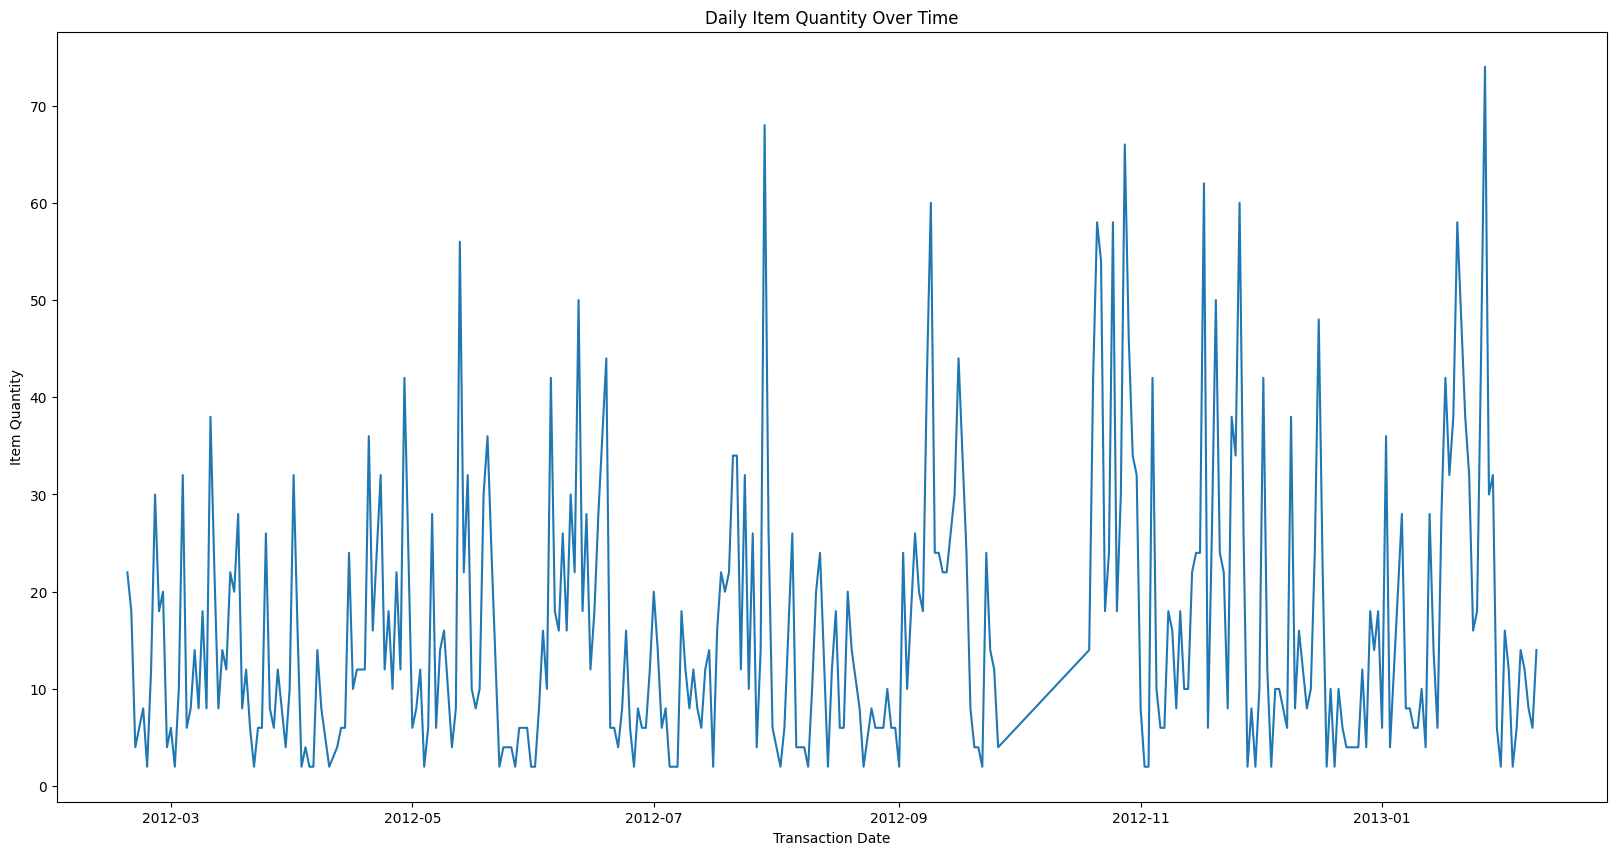

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(daily_df_FAGE['TXN_DTE'], daily_df_FAGE['ITEM_QTY'])
plt.title('Daily Item Quantity Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Item Quantity')
plt.show()

## Periodic Review

In [ ]:
'''
assumptions:
1. Lead Time = 2 week
2. Reorder Interval = 2 weeks

4. CSL = 0.95
5. holding cost = 0.03 dollars per unit per day
6. transportation cost = 0.07 dollars per unit
7. ordering cost = 100 dollars




'''

'\nassumptions:\n1. Lead Time = 2 week\n2. Reorder Interval = 2 weeks\n\n4. CSL = 0.95\n5. holding cost = 0.03 dollars per unit per day\n6. transportation cost = 0.07 dollars per unit \n7. ordering cost = 100 dollars\n\n\n\n\n'

In [ ]:
# assumptions/variables
L = 2
T = 2
CSL = 0.95
HC = 0.03 * 7
TC = 0.07
OC = 100

In [ ]:
Demand_FAGE = np.mean(weekly_df_FAGE['ITEM_QTY'])
Demand_FAGE

104.61538461538461

In [ ]:
SD_FAGE = np.std(weekly_df_FAGE['ITEM_QTY'])
SD_FAGE

60.97608416614408

In [ ]:
z = norm.ppf(CSL)

In [ ]:
SS_FAGE = z * SD_FAGE * np.sqrt(T + L)
SS_FAGE = round(SS_FAGE)
print(f'Safety stock for FAGE is {SS_FAGE:.0f} units')

Safety stock for YOPLAIT is 201 units


In [ ]:
OUL_FAGE = Demand_FAGE * (T+L) + SS_FAGE
OUL_FAGE = round(OUL_FAGE)
print(f'OUL for FAGE is {OUL_FAGE:.0f} units')

OUL for YOPLAIT is 619 units


### Cost Calculation

In [ ]:
weekly_df_FAGE.reset_index(drop=True, inplace=True)

In [ ]:
weekly_df_FAGE_pr = weekly_df_FAGE

In [ ]:
weekly_df_FAGE_pr.head(3)

,TXN_DTE,ITEM_QTY
0,2012-02-19,62
1,2012-02-26,80
2,2012-03-04,92


In [ ]:
# Initialize DataFrame to calculate weekly inventory levels and costs
weekly_df_FAGE_pr['Ending_Inventory'] = 0
weekly_df_FAGE_pr['Order_Quantity'] = 0
weekly_df_FAGE_pr['Weekly_Holding_Cost'] = 0
weekly_df_FAGE_pr['Weekly_Transportation_Cost'] = 0

# Initial inventory set to 0 for the first week
inventory = 0

# Simulate weekly inventory and order calculations
for i in range(len(weekly_df_FAGE_pr)):
    if i == 0:
        # No initial inventory, so order up to OUL
        order_quantity = OUL_FAGE - inventory
    else:
        # Calculate needed order quantity to reach OUL
        order_quantity = max(0, OUL_FAGE - inventory)

    # Update inventory after order is received
    inventory = inventory + order_quantity - weekly_df_FAGE_pr.loc[i, 'ITEM_QTY']
    inventory = max(0, inventory)  # Inventory cannot be negative

    # Calculate costs
    weekly_holding_cost = inventory * HC
    weekly_transportation_order_cost = order_quantity * TC + OC

    # Record the calculations
    weekly_df_FAGE_pr.loc[i, 'Ending_Inventory'] = inventory
    weekly_df_FAGE_pr.loc[i, 'Order_Quantity'] = order_quantity
    weekly_df_FAGE_pr.loc[i, 'Weekly_Holding_Cost'] = weekly_holding_cost
    weekly_df_FAGE_pr.loc[i, 'weekly_transportation_order_cost'] = weekly_transportation_order_cost

# Sum up total costs for the year
total_holding_costs = weekly_df_FAGE_pr['Weekly_Holding_Cost'].sum()
toal_transportation_order_cost = weekly_df_FAGE_pr['weekly_transportation_order_cost'].sum()
total_cost = total_holding_costs + toal_transportation_order_cost
round(total_holding_costs), round(toal_transportation_order_cost), round(total_cost), weekly_df_FAGE_pr

(5617,
 5620,
 11237,
       TXN_DTE  ITEM_QTY  Ending_Inventory  Order_Quantity  \
 0  2012-02-19        62               557             619   
 1  2012-02-26        80               539              62   
 2  2012-03-04        92               527              80   
 3  2012-03-11       100               519              92   
 4  2012-03-18       126               493             100   
 5  2012-03-25        66               553             126   
 6  2012-04-01        80               539              66   
 7  2012-04-08        48               571              80   
 8  2012-04-15        42               577              48   
 9  2012-04-22       122               497              42   
 10 2012-04-29       148               471             122   
 11 2012-05-06        86               533             148   
 12 2012-05-13       114               505              86   
 13 2012-05-20       148               471             114   
 14 2012-05-27        40               579      

## Continuous Review

In [ ]:
daily_df_FAGE_cr = daily_df_FAGE

In [ ]:
Demand_FAGE = np.mean(daily_df_FAGE['ITEM_QTY'])
Demand_FAGE
print(f'Daily demand for YOPLAIT is {Demand_FAGE:.0f} units')

Daily demand for YOPLAIT is 17 units


In [ ]:
SD_FAGE = np.std(daily_df_FAGE['ITEM_QTY'])
SD_FAGE

14.0887837360254

In [ ]:
SS_FAGE = z * SD_FAGE * np.sqrt(T + L)
SS_FAGE = round(SS_FAGE)
print(f'Daily Safety stock for YOPLAIT is {SS_FAGE:.0f} units')

Daily Safety stock for YOPLAIT is 46 units


In [ ]:
ROP_FAGE = Demand_FAGE * L * 7 + SS_FAGE
ROP_FAGE = round(ROP_FAGE)
print(f'Reorder point for YOPLAIT is {ROP_FAGE:.0f} units')

Reorder point for YOPLAIT is 279 units


In [ ]:
annual_demand_FAGE = daily_df_FAGE_cr['ITEM_QTY'].sum()
EOQ_FAGE = np.sqrt((2 * annual_demand_FAGE * OC)/ (HC/7*365))
EOQ_FAGE = round(EOQ_FAGE)
print(f'Reorder quantity for YOPLAIT is {EOQ_FAGE:.0f} units')

Reorder quantity for YOPLAIT is 314 units


### cost

In [ ]:
# Initialize inventory simulation DataFrame
daily_df_FAGE_cr['Ending_Inventory'] = 0
daily_df_FAGE_cr['Order_Quantity'] = 0
daily_df_FAGE_cr['daily_Holding_Cost'] = 0
daily_df_FAGE_cr['daily_transportation_order_cost'] = 0
daily_df_FAGE_cr['Order_Placed'] = False

# Initial inventory set to reorder point for the start
inventory = ROP_FAGE
total_ordering_costs = 0

# Simulate weekly inventory and order calculations
for i in range(len(daily_df_FAGE_cr)):
    # Start the week by checking if an order is needed
    if inventory <= ROP_FAGE:
        order_quantity = EOQ_FAGE
        total_ordering_costs += OC
        inventory += order_quantity
        daily_df_FAGE_cr.at[i, 'Order_Placed'] = True
        daily_df_FAGE_cr.at[i, 'daily_transportation_order_cost'] = order_quantity * TC + OC
    else:
        order_quantity = 0
        daily_df_FAGE_cr.at[i, 'daily_transportation_order_cost'] = 0

    # Reduce inventory by the week's demand and update DataFrame
    inventory -= daily_df_FAGE_cr.loc[i, 'ITEM_QTY']
    inventory = max(0, inventory)  # Ensure inventory does not go negative
    weekly_holding_cost = inventory * (HC/7)  # Weekly holding cost

    # Record the calculations
    daily_df_FAGE_cr.at[i, 'Ending_Inventory'] = inventory
    daily_df_FAGE_cr.at[i, 'Order_Quantity'] = order_quantity
    daily_df_FAGE_cr.at[i, 'daily_Holding_Cost'] = weekly_holding_cost

# Calculate total costs
total_holding_costs = daily_df_FAGE_cr['daily_Holding_Cost'].sum()
total_transportation_order_cost = daily_df_FAGE_cr['daily_transportation_order_cost'].sum()
total_cost = total_holding_costs + total_transportation_order_cost
# Output results
round(total_holding_costs), round(total_transportation_order_cost), round(total_cost), daily_df_FAGE_cr

(4140,
 2196,
 6335,
      index    TXN_DTE  ITEM_QTY  Ending_Inventory  Order_Quantity  \
 0        5 2012-02-19        22               571             314   
 1        6 2012-02-20        18               553               0   
 2        7 2012-02-21         4               549               0   
 3        8 2012-02-22         6               543               0   
 4        9 2012-02-23         8               535               0   
 ..     ...        ...       ...               ...             ...   
 319    324 2013-02-05        14               571               0   
 320    325 2013-02-06        12               559               0   
 321    326 2013-02-07         8               551               0   
 322    327 2013-02-08         6               545               0   
 323    328 2013-02-09        14               531               0   
 
      daily_Holding_Cost  daily_transportation_order_cost  Order_Placed  
 0                 17.13                           121.98      